<a href="https://colab.research.google.com/github/msudhanshu10/Complete-Data-Science/blob/master/How_to_find_optimal_ROC_value_for_a_classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

In [2]:
X, y= make_classification(n_samples=2000, n_features=20, n_classes=2, weights=[1,1], random_state=1)
## weight is to assign ration of 1 class to another


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)

In [3]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

Applying various classification algorithms.

# 1. RandomForestClassifier

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_train_prob1= rf_model.predict_proba(X_train)
y_test_prob1= rf_model.predict_proba(X_test)

print('RF ROC train:', roc_auc_score(y_train, y_train_prob1[:,1]))
print('Rf ROC test:',roc_auc_score(y_test, y_test_prob1[:,1]))

RF ROC train: 0.9999999999999999
Rf ROC test: 0.9837055555555556


# 2. logistic regression

In [7]:
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression()
lr_model.fit(X_train, y_train)

y_train_prob2= lr_model.predict_proba(X_train)
y_test_prob2= lr_model.predict_proba(X_test)

print('Logistic Regression ROC train:', roc_auc_score(y_train, y_train_prob2[:,1]))
print('Rf ROC test:',roc_auc_score(y_test, y_test_prob2[:,1]))

Logistic Regression ROC train: 0.9863568922694498
Rf ROC test: 0.9885777777777777


# 3. AdaBoost Classifier

In [8]:
from sklearn.ensemble import AdaBoostClassifier
ada_model= AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_train_prob3= ada_model.predict_proba(X_train)
y_test_prob3= ada_model.predict_proba(X_test)
print('AdaboostClassifier ROC train:', roc_auc_score(y_train, y_train_prob3[:,1]))
print('AdaboostClassifie ROC test:',roc_auc_score(y_test, y_test_prob3[:,1]))

AdaboostClassifier ROC train: 0.9975081174960356
AdaboostClassifie ROC test: 0.9826111111111111


# 4. KNN_Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_train_prob4= knn_model.predict_proba(X_train)
y_test_prob4= knn_model.predict_proba(X_test)
print('KNN_Classifier ROC train:', roc_auc_score(y_train, y_train_prob4[:,1]))
print('KNN_Classifie ROC test:',roc_auc_score(y_test, y_test_prob4[:,1]))

KNN_Classifier ROC train: 0.981670071491109
KNN_Classifie ROC test: 0.9426111111111111


In [10]:
pred=[]

for model in [rf_model, lr_model, ada_model, knn_model]:
  pred.append(pd.Series(model.predict_proba(X_test)[:,1]))

final_pred= pd.concat(pred, axis=1).mean(axis=1)

In [11]:
pd.concat(pred, axis=1) # Converting predicted probabilty series to a data frame with 600 test data points and 4 models as columns.

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.95,0.966929,0.538202,0.8
3,0.93,0.761539,0.509875,0.8
4,0.60,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.04,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [12]:
final_pred

0      0.885262
1      0.115823
2      0.813783
3      0.750353
4      0.567447
         ...   
595    0.121340
596    0.120345
597    0.879197
598    0.160717
599    0.834857
Length: 600, dtype: float64

In [13]:
## fpr= False Positive Rate
## tpr= True Positive Rate
## threshold

fpr, tpr, threshold= roc_curve(y_test, final_pred)
threshold


array([1.91188114, 0.91188114, 0.91156694, 0.90827475, 0.79301733,
       0.79162833, 0.78387064, 0.7830558 , 0.77992916, 0.77821156,
       0.75545305, 0.75537124, 0.73180851, 0.73137362, 0.71475181,
       0.71143711, 0.68147732, 0.67743537, 0.58077749, 0.57800386,
       0.57656376, 0.57486186, 0.54542732, 0.54139283, 0.53595371,
       0.53469563, 0.53105932, 0.49616892, 0.45990225, 0.44544916,
       0.4396034 , 0.39722765, 0.39379719, 0.34062235, 0.33836612,
       0.23217239, 0.23140421, 0.22848126, 0.22646893, 0.21233682,
       0.20598417, 0.12295384, 0.1228351 , 0.10632697])

In [15]:
# Which threshold value to select?
from sklearn.metrics import accuracy_score

acc= []

for thres in threshold:
  y_pred= np.where(final_pred>thres, 1, 0)
  acc.append(accuracy_score(y_test, y_pred, normalize=True))

acc= pd.concat([pd.Series(threshold), pd.Series(acc)], axis=1)

acc.columns=['Threshold', 'Accuracy']
acc.sort_values(by='Accuracy', ascending=False, inplace=True)
acc.head(10)

,Threshold,Accuracy
29,0.445449,0.961667
30,0.439603,0.960000
28,0.459902,0.960000
25,0.534696,0.960000
27,0.496169,0.958333
26,0.531059,0.958333
24,0.535954,0.958333
23,0.541393,0.958333
22,0.545427,0.956667
31,0.397228,0.955000


In [20]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr,tpr, color='orange', label='ROC')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC_Curve')
  plt.show()

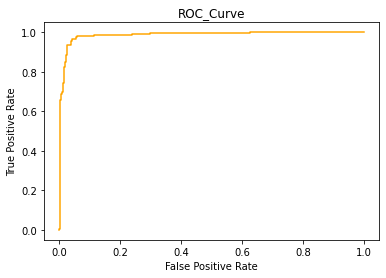

In [21]:
plot_roc_curve(fpr, tpr)